In [20]:
import configparser
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
config = configparser.ConfigParser()
config.read('data.ini')
ticker = 'METROPOLIS'

data = [[] for year in config[ticker]['year'].split()]

for key in config[ticker]:
  col = []
  if key == 'year':
    col = [value.strip() for value in config['METROPOLIS'][key].split(',')]
  else:
    col = [float(value.strip()) for value in config['METROPOLIS'][key].split(',')]
  for index in range(len(data)):
    data[index].append(col[index])

df = pd.DataFrame(data=data, columns=[str(key) for key in config[ticker]])
df = df.set_index('year')

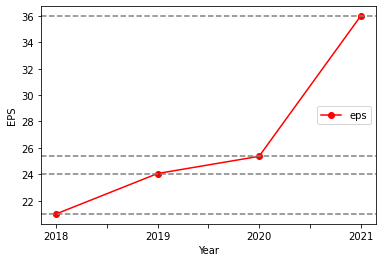

In [29]:
# creating the eps plot
df.reset_index().plot(x='year', y='eps', kind='line', marker='o', color='red', figsize = (6, 4))
for row in df['eps']:
    plt.axhline(y=row, color='grey', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("EPS")
plt.show()

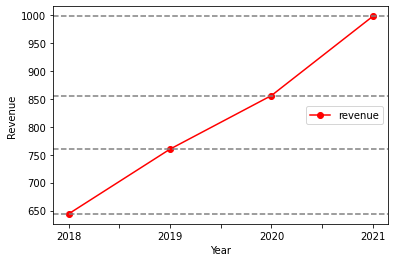

In [30]:
# creating the revenue plot
df.reset_index().plot(x='year', y='revenue', kind='line', marker='o', color='red', figsize = (6, 4))
for row in df['revenue']:
    plt.axhline(y=row, color='grey', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

year
2018      NaN
2019    18.01
2020    12.63
2021    16.59
Name: revenue, dtype: float64

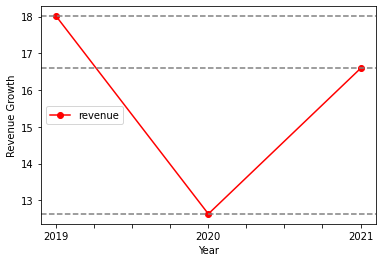

In [31]:
diff = round(df['revenue'].pct_change() * 100, 2)
display(diff)

# creating the revenue growth plot
diff.reset_index().plot(x='year', y='revenue', marker='o', kind='line', color='red', figsize = (6, 4))
for row in diff:
    plt.axhline(y=row, color='grey', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Revenue Growth")
plt.show()

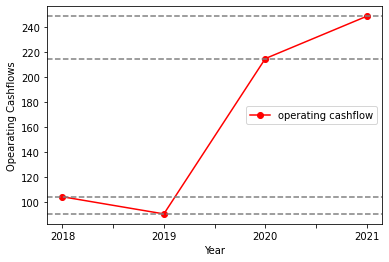

In [35]:
# creating the operating cashflows plot
df.reset_index().plot(x='year', y='operating cashflow', kind='line', marker='o', color='red', figsize = (6, 4))
for row in df['operating cashflow']:
    plt.axhline(y=row, color='grey', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Opearating Cashflows")
plt.show()

year
2018    105.82
2019    125.50
2020    110.18
2021    310.73
Name: free cashflow, dtype: float64

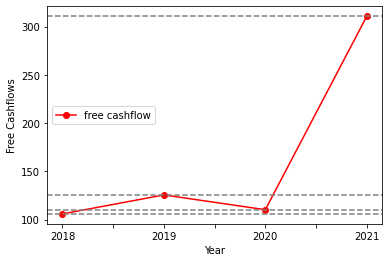

In [36]:
# creating the free cashflows plot
df['free cashflow'] = df['operating cashflow'] + df['investing cashflow']
display(df['free cashflow'])

df.reset_index().plot(x='year', y='free cashflow', kind='line', marker='o', color='red', figsize = (6, 4))
for row in df['free cashflow']:
    plt.axhline(y=row, color='grey', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Free Cashflows")
plt.show()

year
2018    0.928
2019    0.727
2020    1.680
2021    1.361
Name: operating/pat, dtype: float64

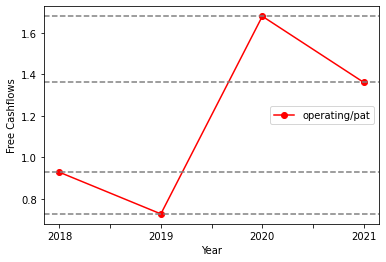

In [37]:
# creating the free cashflows plot
df['operating/pat'] = round(df['operating cashflow'] / df['pat'], 3)
display(df['operating/pat'])

df.reset_index().plot(x='year', y='operating/pat', kind='line', marker='o', color='red', figsize = (6, 4))
for row in df['operating/pat']:
    plt.axhline(y=row, color='grey', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Free Cashflows")
plt.show()